# K means clustering: Unsupervised learning

### Our first unsupervised learning ML algorithm!
The main idea behind K means clustering is to build a model that gathers characteristics and clusters the points into a specefic category.

Steps to building our K means clustering model:
1. Gather random data points(centroids) and visualize them via clusters
2. Define the following functions:

  a) euclidean_distance -  euclidean distance formula 
  
  b) k_means_distance - calculates the distance between points to every centroid
  
  c) k_mean_clusters - the main function, will utilize the previous functions while X will grab data while using the given            centroids
  
  d) k_mean_new_centroids - update function
  
  
3. Predict values using our predictor functions 

<img src="1_rw8IUza1dbffBhiA4i0GNQ.png" style="height:300px">

### Import simple packages

In [3]:
using Statistics
using Plots

### Collect random data and plot the clusters

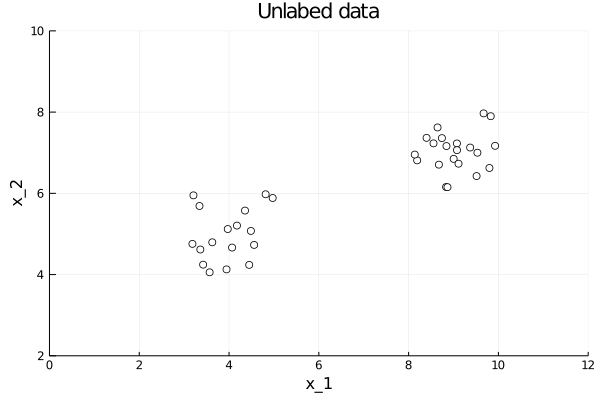

In [5]:
function circleShape(h,k,r)
    θ = LinRange(0,2*π, 500)
    return h.+r*sin.(θ), k.+ r*cos.(θ)
    end 

cluster1 = [(4 + (-1)^rand(1:2)*rand(), 5 + (-1)^rand(1:2)*rand(1:1.5)*rand()) for _ = 1:17]

cluster2 = [(9 + (-1)^rand(1:2)*rand(), 7 + (-1)^rand(1:2)*rand(1:1.5)*rand()) for _ = 1:21]


data = copy(cluster1)
for x in cluster2
    push!(data,x)
end

plot(legend = false, 
xlabel = "x_1", 
xlim = (0,12), 
ylabel = "x_2",
ylim = (2,10),
title = "Unlabed data")

scatter!(data,color = "white")

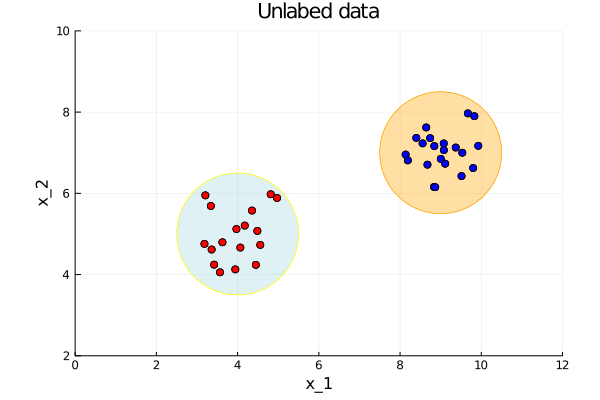

In [7]:
plot!(circleShape(4, 5, 1.5),
        seriestype = [:shape,],
        lw=0.5,
        c="lightblue",
        legend=false,
        linecolor="yellow",
        fillalpha=0.2,
        aspect_ratio=1)

plot!(circleShape(9, 7, 1.5),
        seriestype = [:shape,],
        lw=0.5,
        c="orange",
        legend=false,
        linecolor="orange",
        fillalpha=0.2,
        aspect_ratio=1)

scatter!(cluster1,color = "red")
scatter!(cluster2,color = "blue")

### Distance formulas

<img src="eds.png" style="height:200px">

In [11]:
function euclidean_distance(p1,p2)
    return sqrt(sum([(p1[i]-p2[i])^2 for i =1:length(p1)]))
end


function k_means_distance(X, centroids, k)
    distances = Dict()
    for p in X
        temp_dict = Dict()
        for i = 1:k
            temp_dict[i] = euclidean_distance(p, centroids[i])
        end
        distances[p] = temp_dict
    end
    return distances
end

k_means_distance (generic function with 1 method)

In [19]:
function k_mean_clusters(X, centroids , k)
    distances = k_means_distance(X, centroids , k)
    clusters = Dict()
    for p in X
        clusters[p] = 1
        min_d = distances[p][1]
        for i = 2:k
            if distances[p][i] < min_d
                clusters[p] = i
                min_d = distances[p][i]
                end 
            end 
        end 
    return clusters
end

k_mean_clusters (generic function with 1 method)

Update function:

In [20]:
function k_mean_new_centroids(X,centroids, k)
    clusters = k_mean_clusters(X,centroids,k)
    new_centers = []
    for j = 1:k
        x = mean([p[1] for p in keys(clusters) if clusters[p] == j])
        y = mean([p[2] for p in keys(clusters) if clusters[p] == j])
        point = (x,y)
        push!(new_centers, point)
        end 
    return new_centers
end

k_mean_new_centroids (generic function with 1 method)

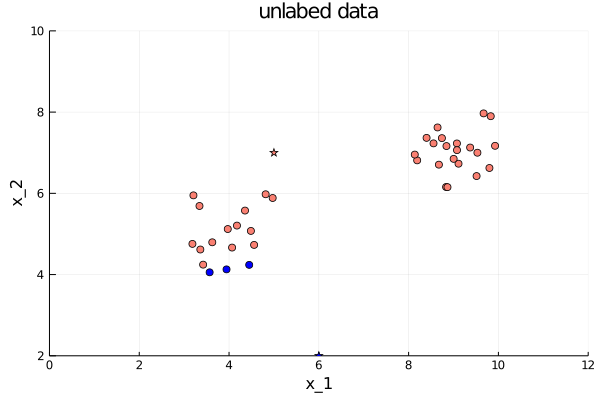

In [21]:

initial_centers = [(rand(1:10),rand(1:10)),(rand(1:10),rand(1:10))]
clusters = k_mean_clusters(data, initial_centers,2)

#plot
plot(legend = false,
    xlim=(0,12),
    xlabel = "x_1", 
    ylim=(2,10),
    ylabel = "x_2",
    title = "unlabed data")

scatter!([x for x in keys(clusters) if clusters[x] == 1], color = "salmon", legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2], color = "blue", legend = false)

scatter!([initial_centers[1]], color = "salmon", shape = :star5)
scatter!([initial_centers[2]], color = "blue", shape = :star5)

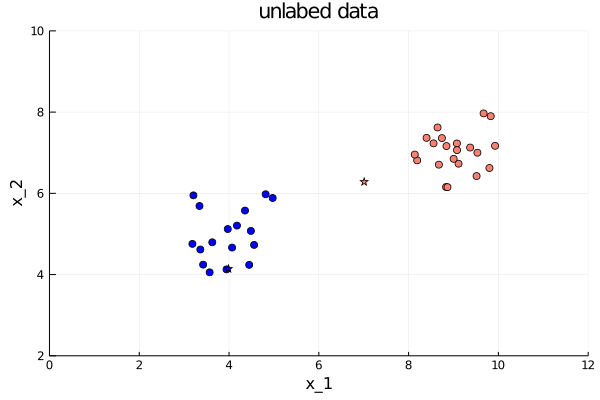

In [22]:
centroids_test1 = k_mean_new_centroids(data, initial_centers, 2)

clusters = k_mean_clusters(data,centroids_test1, 2)

plot(legend = false,
    xlim=(0,12),
    xlabel = "x_1", 
    ylim=(2,10),
    ylabel = "x_2",
    title = "unlabed data")

scatter!([x for x in keys(clusters) if clusters[x] == 1], color = "salmon", legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2], color = "blue", legend = false)

scatter!([centroids_test1[1]], color = "salmon", shape = :star5)
scatter!([centroids_test1[2]], color = "blue", shape = :star5)

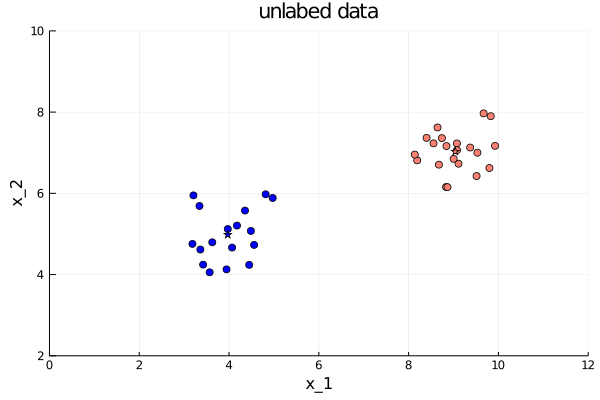

In [23]:
centroids_test2 = k_mean_new_centroids(data, centroids_test1, 2)

clusters = k_mean_clusters(data,centroids_test2, 2)

plot(legend = false,
    xlim=(0,12),
    xlabel = "x_1", 
    ylim=(2,10),
    ylabel = "x_2",
    title = "unlabed data")

scatter!([x for x in keys(clusters) if clusters[x] == 1], color = "salmon", legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2], color = "blue", legend = false)

scatter!([centroids_test2[1]], color = "salmon", shape = :star5)
scatter!([centroids_test2[2]], color = "blue", shape = :star5)

### Build the K means algorithm and iterate

In [24]:
function k_Means_algorithm(X, k, ϵ; return_centroids = false)
    
    centroids = []
    for _ = 1:k
        i = rand(1:length(X))
        j = rand(1:length(X))/length(X)
        push!(centroids, (X[i][1] + j, X[i][2] - j))
    end
    
    new_centroids = k_mean_new_centroids(X, centroids, k)
    h = 1
    while maximum([euclidean_distance(centroids[i], new_centroids[i]) for i = 1:k]) > ϵ && h < 10000000
        centroids, new_centroids = new_centroids, k_mean_new_centroids(X, new_centroids, k)
        h+=1
    end
    
    if return_centroids == false
        return k_mean_clusters(X, new_centroids, k)
        
    else
        return new_centroids
    end
end

k_Means_algorithm (generic function with 1 method)

In [25]:
k_Means_algorithm(data, 2, 0.0001, return_centroids = false)

Dict{Any,Any} with 38 entries:
  (9.67022, 7.96817) => 2
  (8.83509, 6.15616) => 2
  (8.1908, 6.81189)  => 2
  (8.86577, 6.15201) => 2
  (4.97191, 5.88511) => 1
  (3.9716, 5.12082)  => 1
  (4.06798, 4.66448) => 1
  (3.62686, 4.79438) => 1
  (3.56755, 4.05532) => 1
  (9.37078, 7.12747) => 2
  (3.34176, 5.68847) => 1
  (8.13727, 6.95418) => 2
  (9.07578, 7.22797) => 2
  (8.74153, 7.35904) => 2
  (4.44928, 4.23852) => 1
  (8.64464, 7.62199) => 2
  (9.07781, 7.06346) => 2
  (9.82926, 7.89881) => 2
  (4.81546, 5.97664) => 1
  (9.92585, 7.16973) => 2
  (4.55855, 4.73013) => 1
  (3.94411, 4.12744) => 1
  (4.35546, 5.57556) => 1
  (3.42316, 4.24411) => 1
  (4.48685, 5.07432) => 1
  ⋮                  => ⋮

In [26]:
ct = k_Means_algorithm(data, 2, 0.0001, return_centroids = true)

2-element Array{Any,1}:
 (9.03801068187348, 7.028702759565029)  
 (3.9711165822284586, 4.982516568621283)

Plot the k mean predictions, compare to the original cluster plot.

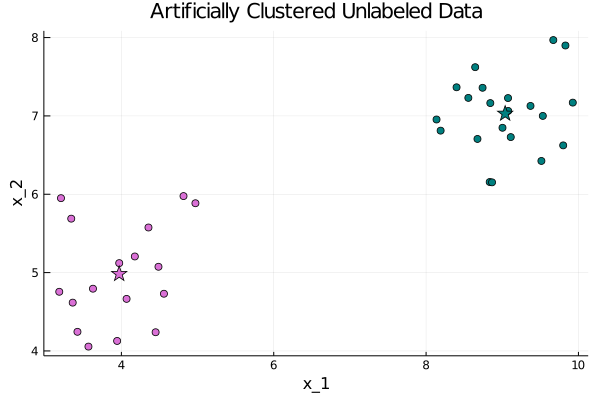

In [28]:
plot(legend = false, xlabel = "x_1", ylabel = "x_2",
    title = "Artificially Clustered Unlabeled Data")

scatter!([x for x in keys(clusters) if clusters[x] == 1], color = "teal", legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2], color = "orchid", legend = false)

scatter!([ct[1]], color = "teal", shape= :star5, markersize=8)
scatter!([ct[2]], color = "orchid", shape= :star5, markersize=8)

References:

https://www.youtube.com/watch?v=aNS0k-JPE9o

https://towardsdatascience.com/k-means-a-complete-introduction-1702af9cd8c

http://www.saedsayad.com/clustering_kmeans.htm